In [2]:
import os
import shutil
from PIL import Image
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
root_dir = os.getcwd() + '/data_processing/'
with_mask_dir = root_dir + 'with_mask/'
without_mask_dir = root_dir + 'without_mask/'
irre_dir = root_dir + 'irrelevant/'
with_mask_resized_dir = root_dir + 'with_mask_resized/'
without_mask_resized_dir = root_dir + 'without_mask_resized/'
irre_resized_dir = root_dir + 'irrelevant_resized/'
data_dir = root_dir + 'data/'

In [7]:
data_dir = root_dir + 'data/'
train_set = root_dir + 'train_set/'
val_set = root_dir + 'val_set/'
test_set = root_dir + 'test_set/'
train_labels_file = root_dir + 'train_labels.pt'
val_labels_file = root_dir + 'val_labels.pt'
test_labels_file = root_dir + 'test_labels.pt'

In [8]:
def get_value(root, target_label_file):
    labels = torch.load(target_label_file)
    without_mask = with_mask = no_face = 0
    for i in range(len(labels)):
        label = labels[i].item()
        if label == 0:
            without_mask += 1
        elif label == 1:
            with_mask += 1
        elif label == 2:
            no_face += 1
    return [without_mask, with_mask, no_face]

train:
without masks:  7427
with masks:  4527
no faces:  1672
val:
without masks:  1563
with masks:  986
no faces:  370
test:
without masks:  1554
with masks:  1015
no faces:  350


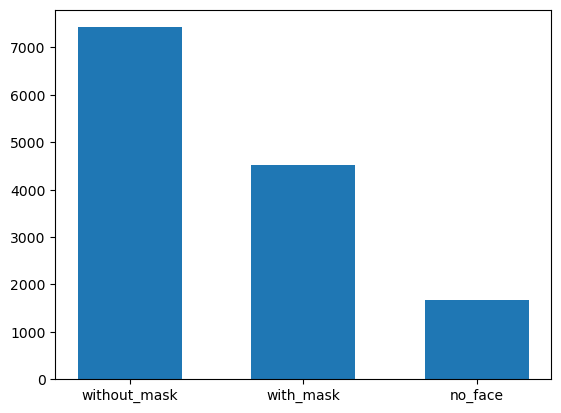

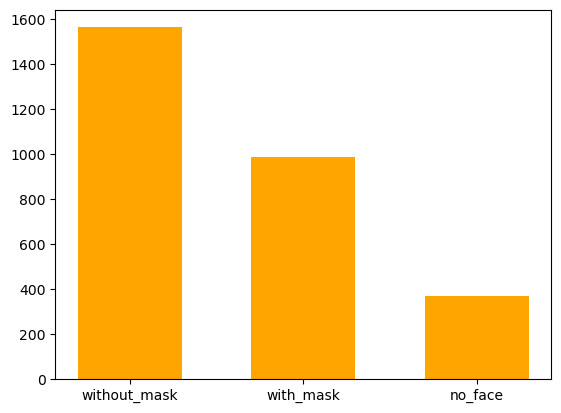

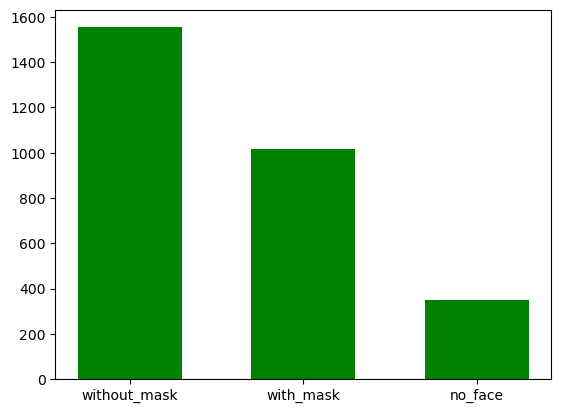

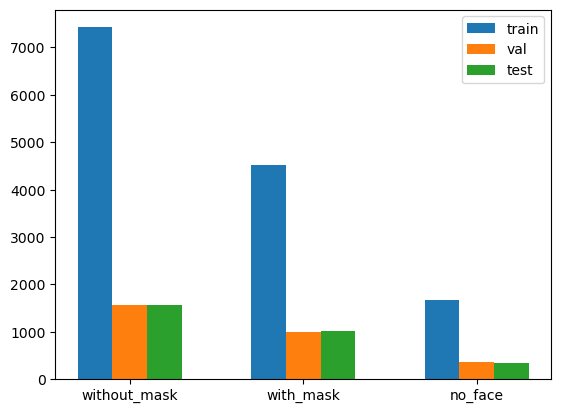

In [9]:
train = get_value(train_set, train_labels_file)
val = get_value(val_set, val_labels_file)
test = get_value(test_set, test_labels_file)
labels = ['without_mask', 'with_mask', 'no_face']

print("train:")
print("without masks: ", train[0])
print("with masks: ", train[1])
print("no faces: ", train[2])
print("val:")
print("without masks: ", val[0])
print("with masks: ", val[1])
print("no faces: ", val[2])
print("test:")
print("without masks: ", test[0])
print("with masks: ", test[1])
print("no faces: ", test[2])

plt.bar(range(len(train)), train, width=0.6, tick_label=labels)
plt.show()
plt.bar(range(len(val)), val, width=0.6, tick_label=labels, fc='orange')
plt.show()
plt.bar(range(len(test)), test, width=0.6, tick_label=labels, fc='g')
plt.show()

x = np.arange(len(train))
total_width, n = 0.6, 3
width = total_width / n
x = x - (total_width - width) / 2
 
plt.bar(x, train, width=width, label='train')
plt.bar(x + width, val, width=width, label='val')
plt.bar(x + 2 * width, test, width=width, label='test')
plt.xticks(x + width, labels)
plt.legend()
plt.show()